In [2]:
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from copy import deepcopy

import utility as uti

import seaborn as sns
sns.set_theme(style='darkgrid')

In [3]:
seed = 2021

# Présentation de la base german credit scoring / cas d'usage (prédiction risque de défaut)

Pour étudier les différentes catégories d’éthique de l'intelligence artificielle définies plus haut, nous utilisons une version nettoyée de la base de données : [German Credit Risk](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).
Cette base de données est mise à disposition par le professeur Hofmann et contient 1000 entrées chacune composée de 22 variables. Chaque entrée représente une personne qui a contracté un emprunt à une banque. Chaque personne est alors placée dans la classe “0” si elle a remboursé son crédit ou dans la classe “1” si elle n’a pas réussi à le rembourser. Cette classification correspond à la variable "default".

In [4]:
credit = pd.read_csv("data/german_credit_prepared.csv", 
                     sep=",", 
                     engine="python")
credit.iloc[0]

default                                                                       0
account_check_status                                                     < 0 DM
duration_in_month                                                             6
credit_history                critical account/ other credits existing (not ...
purpose                                                     domestic appliances
credit_amount                                                              1169
savings                                             unknown/ no savings account
present_emp_since                                                 .. >= 7 years
installment_as_income_perc                                                    4
sex                                                                        male
personal_status                                                          single
other_debtors                                                              none
present_res_since                       

# Création du modèle

On va créer un modèle qui décidera s'il faut accorder un prêt à un nouvel individu, le modèle prédisant si ce dernier arrivera à rembourser ce prêt ou non. On cherche ainsi à créer un classifieur qui étant donné les caractéristiques d'une personne la place dans la classe 0 s'il faut lui accorder un prêt (car il y a de grandes chances qu'elle rembourse ce prêt) et dans la classe 1 sinon. L'idée est par la suite d'appliquer les différentes méthodes d'éthique au modèle ainsi créé. On choisit ici une régression logistique car c’est un modèle très utilisé dans les banques à la fois pour sa simplicité et son efficacité. De plus, utiliser une régression logistique illustre la pertinence des problématiques éthiques pour les modèles les plus simples tels que la régression logistique. 

In [5]:
y = credit.default 
X = credit.drop(columns=["default"])

# class the variable between categorical and ordinal 
cat_variables = [col for col in X.columns if credit[col].dtype==object]
ord_variables = [col for col in X.columns if credit[col].dtype==int]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_variables),
        ('ord', StandardScaler(), ord_variables)
    ])

model = Pipeline(
        [
            ('prepro', preprocess),
            ('logreg', LogisticRegression())
        ]
)

In [6]:
split = model_selection.train_test_split(X, y, 
                                         test_size=0.20,
                                         random_state=seed)
X_train, X_test, y_train, y_test = split

logreg = deepcopy(model.fit(X_train, y_train))

# Présentation de la performance du modèle

Les performances du modèles sont mesurées par les quatre notions suivantes :
 - *Sensitivity* : la fraction de labels 1 prédits correctement, ici la fraction de personnes ayant fait défaut qui sont prédit comme incapable de rembourser sur la totalité des personnes prédites comme incapables de rembourser. 
 - *Specificity* : la fraction de labels 0 prédits correctement, ici la fraction de personnes ayant remboursé leur prêt et qui sont prédit comme capable de rembourser, sur la totalité des personnes qui sont prédit comme capables de rembourser.
 - *Precision* : la fraction de label prédit comme 1 correct, ici la fraction de personnes prédites comme incapable de rembourser et qui ont fait défaut sur la totalité des personnes ayant fait défaut.
 - *Accuracy* : la fraction de label correct sur la totalité des personnes, ici la fraction de personnes donc le label est correct sur la totalité des personnes.

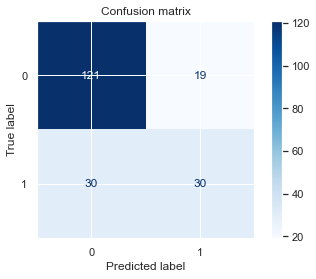

Sensitivity  Specificity   Precision     Accuracy  
    0.86         0.50         0.61         0.76    


In [7]:
uti.mesure_clas(logreg, X_test, y_test)

Les valeurs obtenues pour chacune des mesures nous permettent de dire que le modèle entraîné fait de bonnes prédictions. On va utiliser ce modèle pour les trois notebooks illustrant respectivement les notions de robustness, fairness et de privacy.